# Emotion Detection

### Importing Libraries

In [1]:
import matplotlib.pyplot as plt
from glob import glob
import cv2
import random
import os
%matplotlib inline

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout, Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model

from IPython.display import SVG, Image
import tensorflow as tf


### Exploring Dataset

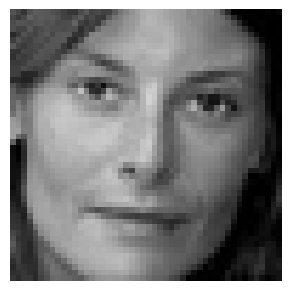

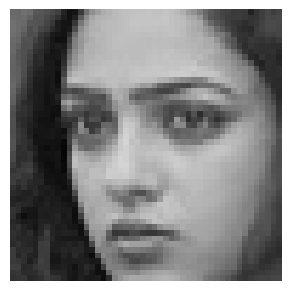

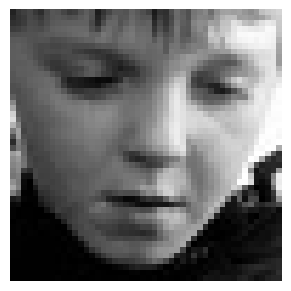

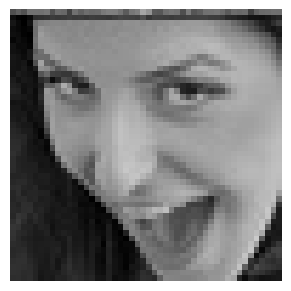

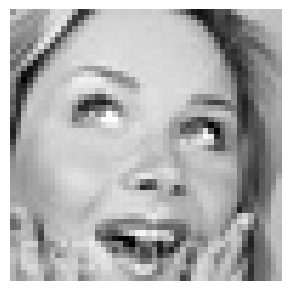

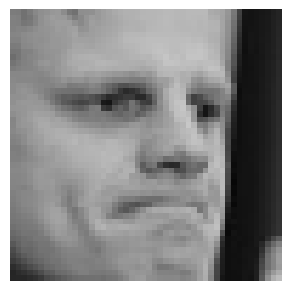

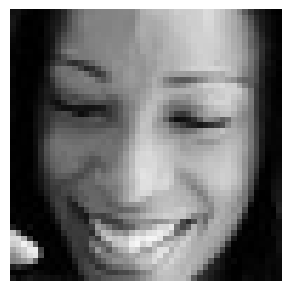

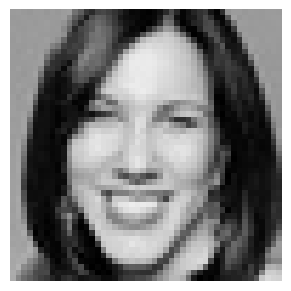

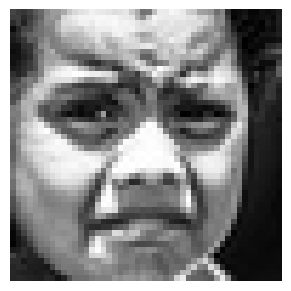

In [2]:
images = glob("train/**/**")
for i in range(9):
    image = random.choice(images)
    #print(image.shape)
    plt.figure(figsize=(12,12))
    plt.subplot(331+i)
    img = cv2.imread(image)
    plt.imshow(img);plt.axis('off')

In [3]:
cv2.imread(images[100]).shape

(48, 48, 3)

### Preparing data for training

In [7]:
img_size = 48
batch_size = 64
datagen_train = ImageDataGenerator()
train_generator = datagen_train.flow_from_directory("train/",
                                                    target_size = (img_size, img_size),
                                                    color_mode = "grayscale",
                                                    batch_size = batch_size,
                                                    class_mode = 'categorical',
                                                    shuffle = True)

datagen_validation = ImageDataGenerator()
validation_generator = datagen_train.flow_from_directory("test/",
                                                    target_size = (img_size, img_size),
                                                    color_mode = "grayscale",
                                                    batch_size = batch_size,
                                                    class_mode = 'categorical',
                                                    shuffle = True)


Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [9]:
train_generator.target_size

(48, 48)

**Defing Model**

In [11]:
def Convolution(input_tensor, filters, kernel_size):
    x = Conv2D(filters = filters, kernel_size = kernel_size, padding = 'same')(input_tensor)
    x = BatchNormalization(axis=-1)(x)
    x = Activation("relu")(x)
    x = MaxPooling2D(pool_size = (2,2))(x)
    
    return x

In [13]:
def Dense_f(input_tensor, modes):
    x = Dense(modes)(input_tensor)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = Dropout(0.25)(x)
    
    return x

In [15]:
def model_fer(input_shape):
    inputs = Input(input_shape)
    conv_1 = Convolution(inputs, 32, (3,3))
    conv_2 = Convolution(conv_1, 64, (5,5))
    conv_3 = Convolution(conv_2, 128, (3,3))
    
    flatten = Flatten()(conv_3)
    dense_1 = Dense_f(flatten, 256)
    
    output = Dense(7,activation = "softmax")(dense_1)
    model = Model(inputs = [inputs], outputs = [output])
    
    model.compile(loss = ['categorical_crossentropy'], optimizer = 'adam', metrics = ['accuracy'])
    
    return model

In [17]:
model = model_fer((48, 48, 1))
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 48, 48, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 48, 48, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 48, 48, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 48, 48, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 24, 24, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 24, 24, 64)          │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 24, 24, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 24, 24, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 12, 12, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       1,179,904 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │           1,799 │
└──────────────────────────────────────┴─────────────────────────────┴──────────────

 Total params: 1,309,063 (4.99 MB)

 Trainable params: 1,308,103 (4.99 MB)

 Non-trainable params: 960 (3.75 KB)

**Initializing the model**

In [23]:
epochs = 15
steps_per_epoch = train_generator.n//train_generator.batch_size
validation_steps = validation_generator.n//validation_generator.batch_size

checkpoint = ModelCheckpoint("my_model.weights.h5", monitor = 'val_accuracy', save_weights_only = True, mode = 'max', verbose = 1)
callbacks = [checkpoint]

**Training the model**

In [27]:
history = model.fit(
x = train_generator,
epochs = epochs,
validation_data = validation_generator,
callbacks = callbacks)

Epoch 1/15
449/449 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7239 - loss: 0.7648
Epoch 1: saving model to my_model.weights.h5
449/449 ━━━━━━━━━━━━━━━━━━━━ 777s 2s/step - accuracy: 0.7239 - loss: 0.7648 - val_accuracy: 0.5616 - val_loss: 1.2156
Epoch 2/15
449/449 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7791 - loss: 0.6191
Epoch 2: saving model to my_model.weights.h5
449/449 ━━━━━━━━━━━━━━━━━━━━ 686s 2s/step - accuracy: 0.7791 - loss: 0.6192 - val_accuracy: 0.5258 - val_loss: 1.4192
Epoch 3/15
449/449 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8294 - loss: 0.5006
Epoch 3: saving model to my_model.weights.h5
449/449 ━━━━━━━━━━━━━━━━━━━━ 746s 2s/step - accuracy: 0.8294 - loss: 0.5007 - val_accuracy: 0.5632 - val_loss: 1.4553
Epoch 4/15
449/449 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8768 - loss: 0.3676
Epoch 4: saving model to my_model.weights.h5
449/449 ━━━━━━━━━━━━━━━━━━━━ 625s 1s/step - accuracy: 0.8768 - loss: 0.3677 - val_accuracy: 0.5717 - val_loss: 1.5758
Epoch 5/

**Model Evaluation**

In [29]:
model.evaluate(validation_generator)

113/113 ━━━━━━━━━━━━━━━━━━━━ 13s 117ms/step - accuracy: 0.5685 - loss: 2.2220


[2.2029542922973633, 0.5671496391296387]

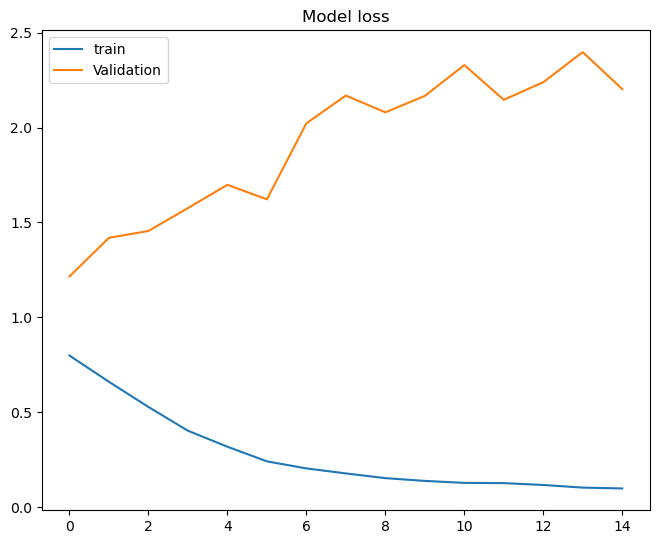

In [31]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.legend(['train','Validation'], loc = 'upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right =0.95,left=0.0,hspace=0.25,wspace=0.35)

**Saving Model**

In [33]:
model_json = model.to_json()
with open("my_model.json","w") as json_file:
    json_file.write(model_json)